**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [87]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [88]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

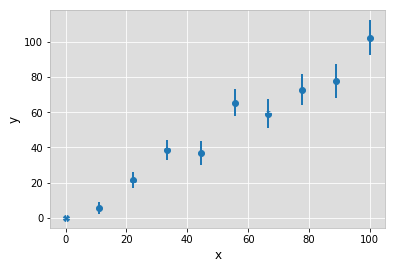

In [89]:
x = linspace(0,100,10)
y = line(1,x,0,errors)
pl.scatter(x,y)
errorbar(x,y, yerr=np.sqrt(x),fmt='.')
pl.xlabel('x')
_=pl.ylabel('y')

### Fig 1: Scatter plot of generated data with error bars. Slpoe=1, intercept=0

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [90]:
zip(x,y,sm.add_constant(x,False))

[(0.0, 0.0, array([ 0.,  1.])),
 (11.111111111111111, 5.7839413374794839, array([ 11.11111111,   1.        ])),
 (22.222222222222221, 21.432625635392487, array([ 22.22222222,   1.        ])),
 (33.333333333333329, 38.471313019873655, array([ 33.33333333,   1.        ])),
 (44.444444444444443, 36.840305926032912, array([ 44.44444444,   1.        ])),
 (55.555555555555557, 65.52063982279806, array([ 55.55555556,   1.        ])),
 (66.666666666666657, 59.106326623587712, array([ 66.66666667,   1.        ])),
 (77.777777777777771, 72.889717972178218, array([ 77.77777778,   1.        ])),
 (88.888888888888886, 77.755574766306893, array([ 88.88888889,   1.        ])),
 (100.0, 102.27036796197969, array([ 100.,    1.]))]

### This function just adds a column of ones to the passed array.

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [91]:
#THE WRONG WAY
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     788.0
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.49e-10
Time:                        16:32:00   Log-Likelihood:                -32.270
No. Observations:                  10   AIC:                             66.54
Df Residuals:                       9   BIC:                             66.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9620      0.034     28.071      0.000       0.884       1.040
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   2.935
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.903
Skew:                           0.629   Prob(JB):                        0.637
Kurtosis:                       2.234   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#THE RIGHT WAY
smfit2 = smf.OLS(y, sm.add_constant(x)).fit()
smfit2.summary()

/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.54e-07
Time:                        16:32:00   Log-Likelihood:                -32.266
No. Observations:                  10   AIC:                             68.53
Df Residuals:                       8   BIC:                             69.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3231      4.006     -0.081      0.938      -9.561       8.914
x1             0.9666      0.068     14.313      0.000       0.811       1.122
==============================================================================
Omnibus:                        1.163   Durbin-Watson:                   2.936
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.857
Skew:                           0.607   Prob(JB):                        0.652
Kurtosis:                       2.235   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Both models produce very similar coefficient for x which are close to true value. Model two has to optimize two parameters to find the optimal solution and that is why it comes up with a slightly different value for slope of x. While in model one we explicitly force the y intrcept term to one.  

### Model 1 has better R squared and BIC which is expected because these metrics penalize higher number of parameters which model 2 has. 

### So overall Model 1 did better in this scenario. So if you have insight about the data generation process and know for fact that intercept is zero it is a good idea to omit it. But if you dont, then it is better to include it.

# 4. plot the data (as points) and both statsmodels fits

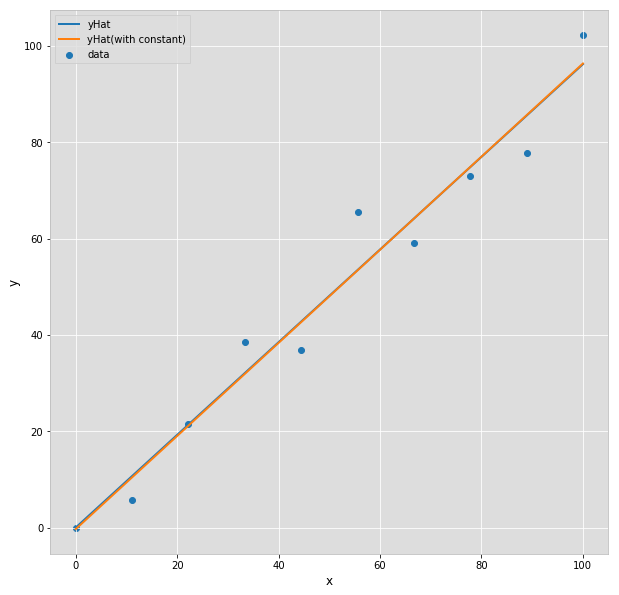

In [93]:
y1 = smfit1.fittedvalues
y2 = smfit2.fittedvalues

figure, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y, label = 'data')
#abline_plot(model_results=smfit1, ax=ax, color='red')
ax.plot(x, y1, label='yHat')
ax.plot(x, y2, label='yHat(with constant)')

pl.xlabel('x')
pl.ylabel('y')

_=pl.legend()

### Fig 2: Scatter plot of generated data with regression lines of two models.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

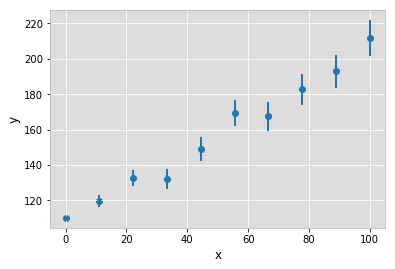

In [142]:
x = linspace(0,100,10)
y = line(1,x,110,errors)
pl.scatter(x,y)
errorbar(x,y, yerr=np.sqrt(x),fmt='.')
pl.xlabel('x')
_=pl.ylabel('y')

### Fig 3: Scatter plot of generated data with error bars. Slpoe=1, intercept=0

# 6. repeat step 3

In [143]:
#THE WRONG WAY
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     59.48
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.96e-05
Time:                        16:53:13   Log-Likelihood:                -54.793
No. Observations:                  10   AIC:                             111.6
Df Residuals:                       9   BIC:                             111.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5135      0.326      7.713      0.000       1.776       3.251
==============================================================================
Omnibus:                        1.129   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.668
Skew:                           0.096   Prob(JB):                        0.716
Kurtosis:                       1.749   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
#THE RIGHT WAY
smfit2 = smf.OLS(y, sm.add_constant(x)).fit()
smfit2.summary()

/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     370.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.50e-08
Time:                        16:53:14   Log-Likelihood:                -29.508
No. Observations:                  10   AIC:                             63.02
Df Residuals:                       8   BIC:                             63.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.4470      3.040     35.340      0.000     100.436     114.458
x1             0.9866      0.051     19.249      0.000       0.868       1.105
==============================================================================
Omnibus:                        0.230   Durbin-Watson:                   2.386
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.393
Skew:                          -0.146   Prob(JB):                        0.821
Kurtosis:                       2.073   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 which takes into account a constant beats Models one in performance metrics. It also yields a correct value for the slope of x unlike model 1 which messes up the slope becasue it tries to pass regression line through point (0,0). i will plot these regrssion lines to emphasize the effect.

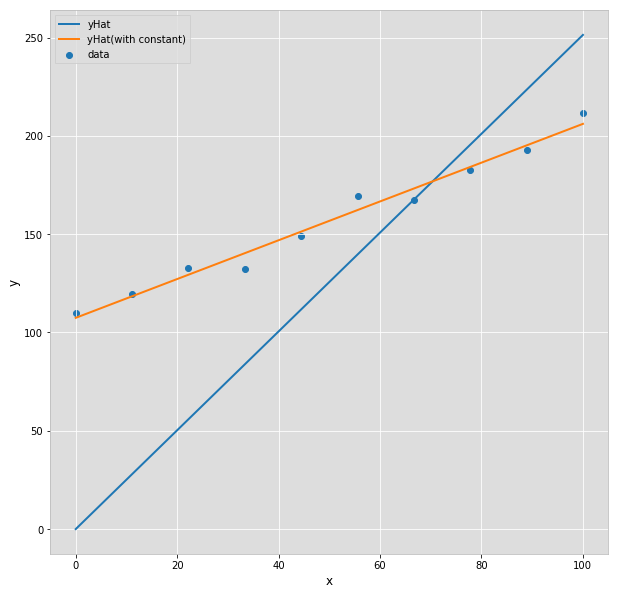

In [145]:
y1 = smfit1.fittedvalues
y2 = smfit2.fittedvalues

figure, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y, label = 'data')
#abline_plot(model_results=smfit1, ax=ax, color='red')
ax.plot(x, y1, label='yHat')
ax.plot(x, y2, label='yHat(with constant)')

pl.xlabel('x')
pl.ylabel('y')

_=pl.legend()

### Fig 4: Scatter plot of generated data with regression lines of two models.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [146]:
mod = sm.WLS(y,sm.add_constant(x), weights=np.sqrt(x))
modfit = mod.fit()
modfit.summary()

/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            WLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     270.0
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.90e-07
Time:                        16:53:18   Log-Likelihood:                   -inf
No. Observations:                  10   AIC:                               inf
Df Residuals:                       8   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.8699      4.322     24.266      0.000      94.904     114.836
x1             1.0240      0.062     16.431      0.000       0.880       1.168
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.576
Skew:                           0.200   Prob(JB):                        0.750
Kurtosis:                       1.895   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Errors were designed to be proportional to square root of x but because there was a random multiplicant in the term, the distribution of errors does not allign with the sqrt(x). The random term was designed as white noise but with such a small sample size it creates bias in the model. If we increase range or density of points errors of the terms will follow the sqrt(x) function better and model above will produce better results with these weights.

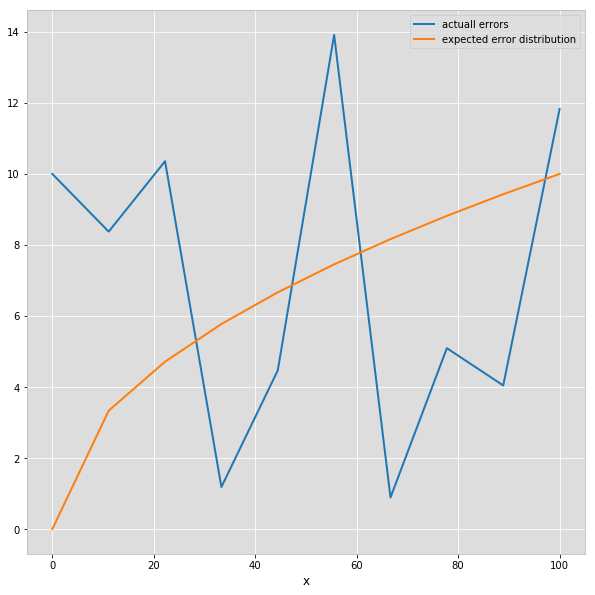

In [147]:
figure, ax = plt.subplots(figsize=(10, 10))

errorsY = np.abs(y-(x+100))
ax.plot(x,errorsY, label='actuall errors')
ax.plot(x,np.sqrt(x), label='expected error distribution')
ax.legend()
_=xlabel('x')

In [148]:
x = linspace(0,100,10000)
y = line(1,x,110,errors)

mod = sm.WLS(y,sm.add_constant(x), weights=np.sqrt(x))
modfit = mod.fit()
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            WLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.116e+05
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:53:35   Log-Likelihood:                   -inf
No. Observations:               10000   AIC:                               inf
Df Residuals:                    9998   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.1577      0.196    563.292      0.000     109.774     110.541
x1             0.9980      0.003    334.089      0.000       0.992       1.004
==============================================================================
Omnibus:                      344.220   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.940
Skew:                           0.080   Prob(JB):                    1.60e-208
Kurtosis:                       4.507   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As expected weighted least square performs great and reproduces almost the exact slop and intercept when the observations are increased.

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.48e-06
Time:                        17:00:30   Log-Likelihood:                -34.557
No. Observations:                  10   AIC:                             73.11
Df Residuals:                       8   BIC:                             73.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.8742      5.037     22.010      0.0

/home/urwa/miniconda3/envs/gpd/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


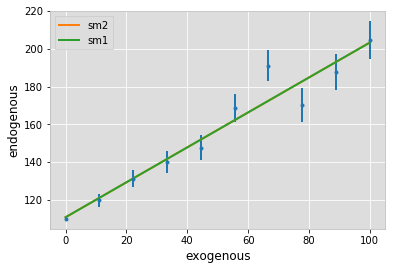

In [155]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
x = linspace(0,100,10)
y = line(1,x,110,errors)
smfit1 = smf.ols('y ~ x', data={'x':x, 'y':y}).fit()
smfit2 = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
print(smfit1.summary())
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit2.fittedvalues, '-', label="sm2")
pl.plot(x, smfit1.fittedvalues, '-', label="sm1")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();